In [86]:
import streamlit as st
import cv2
import numpy as np
import tensorflow as tf
import time
import os
from patchify import patchify, unpatchify
import matplotlib.pyplot as plt
from PIL import Image
import keras
import random
from utils import PSNR

In [87]:
import cv2
import pickle

In [141]:
img_path = "../NoisyImage/Shoes.jpg"
img_path = '../data/convallaria/noisy-img.png'

In [142]:
from matplotlib.image import imread

img = imread(img_path)

In [143]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
nsy_img = cv2.resize(img, (1024, 1024))
nsy_img = nsy_img.astype("float32") / 255.0

In [144]:
img.shape

(3600, 3600, 3)

In [145]:
%matplotlib inline 

## Noisy Image

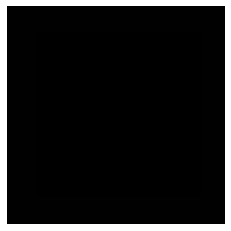

In [146]:
from matplotlib import pyplot as plt
plt.imshow(nsy_img, interpolation='nearest')
plt.axis('off')
plt.show()

# plt.savefig("test.png", bbox_inches='tight')

## Creating patches

In [94]:
def patches(img, patch_size):
    patches = patchify(img, (patch_size, patch_size, 3), step=patch_size)
    return patches

In [95]:
img_patches = patches(nsy_img, 256)

nsy = []
for i in range(4):
    for j in range(4):
        nsy.append(img_patches[i][j][0])
nsy = np.array(nsy)

## Loading the model

In [96]:
def get_model(model_name):
    if model_name.lower() == 'ridnet':
        RIDNet = tf.keras.models.load_model('../models/RIDNet.h5')
        return RIDNet
    else:
        st.text('\n WORK IN PROGRES')

In [97]:
model = get_model('ridnet')

In [98]:
start = time.time()
pred_img = model.predict(nsy)
pred_img = np.reshape(pred_img, (4, 4, 1, 256, 256, 3))
pred_img = unpatchify(pred_img, nsy_img.shape)
end = time.time()

print('Time taken for prediction :', str(round(end-start, 3))+' seconds')

2022-09-14 02:01:12.169129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-14 02:01:17.602 WARNING tensorflow: 5 out of the last 8 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2f5e11790> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 6s 6s/step
Time taken for prediction : 6.112 seconds


2022-09-14 02:01:18.113 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


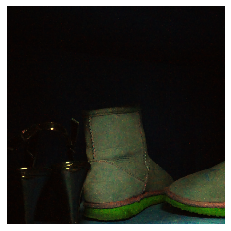

In [99]:
plt.imshow(pred_img, interpolation='nearest')
plt.axis('off')
plt.show()

# plt.savefig("test.png", bbox_inches='tight')

In [100]:
from utils import PSNR

PSNR(nsy_img, pred_img)

25.349397659301758

## Convallaria Data

In [101]:
import matplotlib.pyplot as plt
from patchify import patchify, unpatchify
import cv2
from tifffile import imread
import numpy as np

from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [137]:
path1 = '../data/convallaria/20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif' # Noisy input
path2 = '../data/convallaria/noisy-img.png'
# path3 = './data/convallaria_calibration.tif'

In [138]:
img = imread(path2).astype(np.float32)
# img = img[0, :, :] 

TiffFileError: not a TIFF file b'\x89PNG'

In [139]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
nsy_img = cv2.resize(img, (1024, 1024))
nsy_img = nsy_img.astype("float32") / 255.0

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:3689: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


TypeError: Invalid shape (100, 1024, 1024) for image data

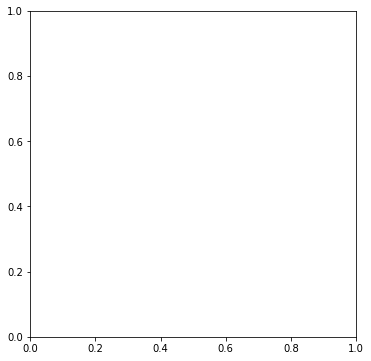

In [140]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img, cmap='magma')
plt.axis('off')

## Create custom patches